## Image Compression using K Means Clustering

### Background
In this notebook, I am performing image compression by leveraging one of the simplest and popular unsupervised machine learning algorithms called K Means Clustering. 

Before we jump into the code, I will try to briefly explain the concept of K Means Clustering and how it can be used to compress images.

### K Means Clustering

It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand. The clusters are then positioned as points and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached.
In a nutshell, it aims to partition a set of observations into a number of clusters (k), resulting in the partitioning of the data. It can be considered a method of finding out which group a certain object really belongs to.

#### The algorithm:

K points are placed into the object data space representing the initial group of centroids\
Each object or data point is assigned into the closest k\
After all objects are assigned, the positions of the k centroids are recalculated\
Steps 2 and 3 are repeated until the positions of the centroids no longer move

K-means clustering has uses in search engines, market segmentation, statistics and even astronomy.

### Using K Means Clustering for Image Compression

K-means clustering will group similar colors together into ‘k’ clusters (say k=64). Therefore, each cluster centroid is the representative of the color vector in RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel which tells the cluster to which this pixel belongs. Additionally, we keep the record of color vectors of each cluster center.

In [1]:
# Importing the necessary libraries

from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reshape the image into a 2D image where each row contains the Red, Green and Blue pixel values
image = io.imread('./Joseph_Bonaparte.jpg')
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows*cols, 3)

In [8]:
image.shape

(984000, 3)

In [4]:
# Implement k-means clustering to form k clusters and perform Compression

clusters = [2**i for i in range(1, 9)]

for i in range(len(clusters)):
    kmeans = KMeans(n_clusters = clusters[i])
    kmeans.fit(image)

    # Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    # Reshape the image to the original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)

    # Save the output image
    io.imsave(f'Compressed_image_{clusters[i]}_clusters.jpg', compressed_image)

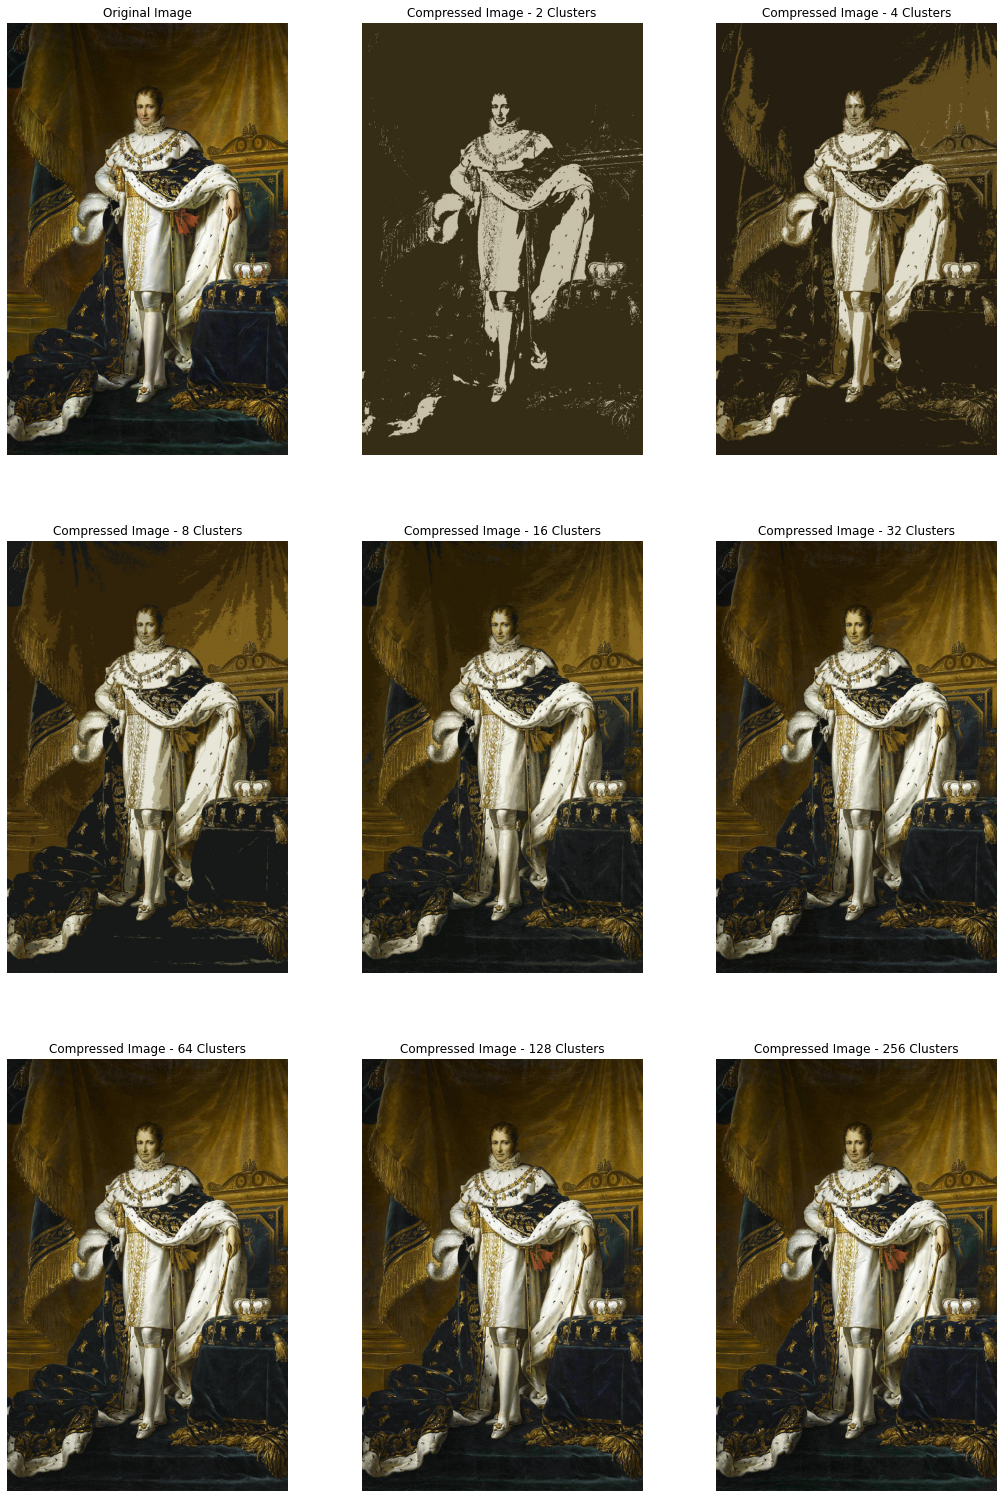

In [92]:
# Load all the compressed images into a dictionary

name = {}

for i in range(len(clusters)):
    name[f"image_{clusters[i]}"] = io.imread(f'./Compressed_image_{clusters[i]}_clusters.jpg')

# Display the original image and the compressed images side by side for comparison

fig = plt.figure(figsize=(18, 27))

fig.add_subplot(3, 3, 1)
original = io.imread('./Joseph_Bonaparte.jpg')
plt.title("Original Image")
plt.imshow(original)
plt.axis('off')

for i in range(len(name)):
    fig.add_subplot(3,3,i+2)
    plt.title(f"Compressed Image - {clusters[i]} Clusters")
    plt.imshow(name[f"image_{clusters[i]}"])
    plt.axis('off')
